In [118]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
# Data input
covid_df = pd.read_csv('owid-covid-data.csv')

In [51]:
#######
# EDA #
#######

# Rows and variable count
print('Rows: ', covid_df.shape[0])
print('Columns: ', covid_df.shape[1])

Rows:  134015
Columns:  67


In [40]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# List of all columns
print(covid_df.columns.to_list())

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [55]:
# Date range
print(covid_df['date'].agg([min,max]))

min    2020-01-01
max    2021-11-17
Name: date, dtype: object


In [53]:
## Location Investigations
# Top 5 countries with data
print(covid_df['location'].value_counts().sort_index().nlargest(5))

Argentina    687
Mexico       687
Peru         687
Thailand     684
Taiwan       672
Name: location, dtype: int64


In [54]:
# Top 5 locations by 
print(covid_df.groupby(['location'], as_index = False)['new_cases']\
                .agg(sum).sort_values(by = 'new_cases')\
                .nlargest(5, columns = 'new_cases'))


                location    new_cases
233                World  254367414.0
91           High income  109871643.0
11                  Asia   80123919.0
225  Upper middle income   80057606.0
68                Europe   69989343.0


In [8]:
# Continents prevalence
print(test_df['continent'].value_counts())

Africa           33133
Europe           30645
Asia             30580
North America    17038
South America     7652
Oceania           6415
Name: continent, dtype: int64

In [57]:
# Unique countries
print('Total Unique Countries: ', covid_df['location'].nunique())
print(covid_df['location'].unique())

Total Unique Countries:  237
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'

In [58]:
# North American countries - Could use just the similar area
print(covid_df[covid_df['continent'] == 'North America']['location'].value_counts())

Mexico                              687
United States                       666
Canada                              662
Guatemala                           640
Dominican Republic                  627
Costa Rica                          622
Panama                              619
Jamaica                             617
Honduras                            617
Cuba                                616
Antigua and Barbuda                 615
Trinidad and Tobago                 614
Saint Vincent and the Grenadines    614
Saint Lucia                         614
Bahamas                             612
Barbados                            611
Nicaragua                           609
El Salvador                         609
Haiti                               608
Dominica                            606
Grenada                             606
Belize                              605
Saint Kitts and Nevis               603
Cayman Islands                      322
Turks and Caicos Islands            300


In [25]:
# Investigating what income based location fields look like
print(test_df[test_df['location']=='Upper middle income'].head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
127138,OWID_UMC,NaN,Upper middle income,2020-01-22,552.0,0.0,NaN,17.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127139,OWID_UMC,NaN,Upper middle income,2020-01-23,645.0,93.0,NaN,18.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127140,OWID_UMC,NaN,Upper middle income,2020-01-24,923.0,278.0,NaN,26.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127141,OWID_UMC,NaN,Upper middle income,2020-01-25,1411.0,488.0,NaN,42.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127142,OWID_UMC,NaN,Upper middle income,2020-01-26,2079.0,668.0,NaN,56.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127799,OWID_UMC,NaN,Upper middle income,2021-11-13,80568437.0,125814.0,132199.000,2144813.0,3632.0,3113.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127800,OWID_UMC,NaN,Upper middle income,2021-11-14,80675003.0,106566.0,130208.000,2147343.0,2530.0,3130.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127801,OWID_UMC,NaN,Upper middle income,2021-11-15,80788235.0,113232.0,128835.143,2150067.0,2724.0,3094.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127802,OWID_UMC,NaN,Upper middle income,2021-11-16,80902722.0,114487.0,124810.429,2152890.0,2823.0,3021.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# US specific investigation
us_df = covid_df[covid_df['location'] == 'United States']

In [13]:
print(us_df[us_df['date'] >='2020-03-01'].head(100))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126511,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,...,19.1,24.6,NaN,2.77,78.86,0.926,-13873.0,-2.53,0.21,-41.671288
126512,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126513,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126514,USA,North America,United States,2020-03-04,107.0,33.0,13.000,11.0,4.0,1.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126515,USA,North America,United States,2020-03-05,184.0,77.0,23.857,12.0,1.0,1.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126606,USA,North America,United States,2020-06-04,1878883.0,21723.0,21145.000,111443.0,1006.0,922.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126607,USA,North America,United States,2020-06-05,1903884.0,25001.0,21183.000,112321.0,878.0,888.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126608,USA,North America,United States,2020-06-06,1925182.0,21298.0,20785.000,112958.0,637.0,843.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126609,USA,North America,United States,2020-06-07,1943595.0,18413.0,20636.286,113415.0,457.0,820.143,...,19.1,24.6,NaN,2.77,78.86,0.926,126610.0,9.51,9.96,380.307201


In [26]:
# Value counts for just USA
# Shows certain columns are same value repeated
for col in us_df.columns:
    print(col)
    print(us_df[col].value_counts())

iso_code
USA    666
Name: iso_code, dtype: int64
continent
North America    666
Name: continent, dtype: int64
location
United States    666
Name: location, dtype: int64
date
2021-11-05    1
2020-03-18    1
2021-08-31    1
2020-04-18    1
2020-02-14    1
             ..
2021-11-17    1
2020-03-05    1
2021-10-21    1
2021-04-18    1
2021-08-19    1
Name: date, Length: 666, dtype: int64
total_cases
14.0          8
16.0          6
12.0          5
5.0           3
8.0           3
             ..
32857015.0    1
34513798.0    1
18626923.0    1
33338894.0    1
39353639.0    1
Name: total_cases, Length: 639, dtype: int64
new_cases
0.0         27
1.0          6
3.0          2
2.0          2
43955.0      2
            ..
140400.0     1
59721.0      1
41864.0      1
24821.0      1
56166.0      1
Name: new_cases, Length: 628, dtype: int64
new_cases_smoothed
0.286         13
0.857          5
0.143          4
0.571          4
0.714          3
              ..
71072.714      1
32274.143      1
239150

In [42]:
# Total Case and NaN progression
print(us_df.sort_values(by='date').head(20))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126472,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126473,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126474,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126475,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126476,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-9227.9,-3.71,-3.11,-27.718481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127133,USA,North America,United States,2021-11-13,47054618.0,47499.0,80789.571,762972.0,452.0,1158.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
127134,USA,North America,United States,2021-11-14,47079428.0,24810.0,79297.143,763092.0,120.0,1157.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
127135,USA,North America,United States,2021-11-15,47221527.0,142099.0,83551.000,764363.0,1271.0,1163.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
127136,USA,North America,United States,2021-11-16,47309008.0,87481.0,84614.143,765811.0,1448.0,1165.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [60]:
# Removing unecessary columns
covid_shrunk_df = covid_df[['iso_code',\
 'date',\
 #'total_cases'(MAYBE?),\
 'new_cases',\
 #'total_deaths'(MAYBE? SUBTRACT NEW DEATHS),\
 #'new_deaths'(MAYBE?),\
 'reproduction_rate',\
 'icu_patients',\
 'hosp_patients',\
 'weekly_icu_admissions',\
 'weekly_hosp_admissions',\
 'new_tests',\
 #'total_tests'(MAYBE? - HIGH TESTS COULD MEAN MORE LIKELY TO FIND),\
 'positive_rate',\
 'tests_per_case',\
 'tests_units',\
 'total_vaccinations',\
 'people_vaccinated',\
 'people_fully_vaccinated',\
 'total_boosters',\
 'new_vaccinations',\
 'stringency_index',\
 'population',\
 'population_density',\
 'median_age',\
 'aged_65_older',\
 'aged_70_older',\
 'gdp_per_capita',\
 'extreme_poverty',\
 'cardiovasc_death_rate',\
 'diabetes_prevalence',\
 'female_smokers',\
 'male_smokers',\
 'handwashing_facilities',\
 'hospital_beds_per_thousand',\
 'life_expectancy',\
 'human_development_index',\
 'excess_mortality']]

In [31]:
print(covid_shrunk_df.head(40))

,iso_code,date,new_cases,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,2020-02-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,2020-03-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,2020-03-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,2020-03-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,2020-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [32]:
print(covid_shrunk_df['iso_code'].value_counts())

PER    687
ARG    687
MEX    687
THA    684
TWN    672
      ... 
SHN     92
PLW     88
PCN     85
FLK     67
NIU     43
Name: iso_code, Length: 237, dtype: int64

In [62]:
# Only countries with over 600 rows of data
covid_shrunk_df[covid_shrunk_df['iso_code'].isin(covid_shrunk_df['iso_code'].value_counts().reset_index(name="count").query("count > 600")["index"])]

,iso_code,date,new_cases,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,2021-11-13,64.0,NaN,NaN,NaN,NaN,NaN,2198.0,0.013,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
134011,ZWE,2021-11-14,35.0,NaN,NaN,NaN,NaN,NaN,2660.0,0.013,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
134012,ZWE,2021-11-15,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
134013,ZWE,2021-11-16,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [64]:
# World only
print(covid_df[covid_df['location'] == 'World'].head(50))

        iso_code continent location        date  total_cases  new_cases  \
131544  OWID_WRL       NaN    World  2020-01-22        557.0        0.0   
131545  OWID_WRL       NaN    World  2020-01-23        655.0       98.0   
131546  OWID_WRL       NaN    World  2020-01-24        941.0      286.0   
131547  OWID_WRL       NaN    World  2020-01-25       1434.0      493.0   
131548  OWID_WRL       NaN    World  2020-01-26       2118.0      684.0   
131549  OWID_WRL       NaN    World  2020-01-27       2927.0      809.0   
131550  OWID_WRL       NaN    World  2020-01-28       5578.0     2651.0   
131551  OWID_WRL       NaN    World  2020-01-29       6167.0      589.0   
131552  OWID_WRL       NaN    World  2020-01-30       8235.0     2068.0   
131553  OWID_WRL       NaN    World  2020-01-31       9927.0     1692.0   
131554  OWID_WRL       NaN    World  2020-02-01      12038.0     2111.0   
131555  OWID_WRL       NaN    World  2020-02-02      16787.0     4749.0   
131556  OWID_WRL       Na

In [44]:
# Minimum Date where total cases over 1
min_dates = covid_df[covid_df['total_cases']>0.0].groupby('location')['date'].min()

In [45]:
print(min_dates)

location
Afghanistan    2020-02-24
Africa         2020-02-14
Albania        2020-03-09
Algeria        2020-02-25
Andorra        2020-03-02
                  ...    
Vietnam        2020-01-23
World          2020-01-22
Yemen          2020-04-10
Zambia         2020-03-18
Zimbabwe       2020-03-20
Name: date, Length: 207, dtype: object


In [65]:
# Max Date where total cases unreported
# This is effectively last date before had first case since it is cumulative
max_missing_dates = covid_df[covid_df['total_cases'].isna()].groupby('location')['date'].max()

In [66]:
print(max_missing_dates)

location
Africa                      2020-02-13
Albania                     2020-03-08
Anguilla                    2021-11-12
Argentina                   2020-03-02
Aruba                       2021-11-16
                               ...    
Tonga                       2021-10-28
Turkmenistan                2021-08-29
Turks and Caicos Islands    2021-11-05
Tuvalu                      2021-10-22
Wallis and Futuna           2021-11-15
Name: date, Length: 73, dtype: object


In [67]:
# Base stats on new cases
covid_df['new_cases'].describe()

count    126650.000000
mean       8376.453999
std       43625.062011
min      -74347.000000
25%           3.000000
50%         104.000000
75%        1081.000000
max      907780.000000
Name: new_cases, dtype: float64

In [92]:
# Countries with first reported cases in the data
# Top countries sorted by average daily new cases
df2=covid_df[covid_df['location'].isin(\
                                   covid_df[(covid_df['total_cases'].isna()) | (covid_df['total_cases']==1)]\
                                   ['location'].unique())\
        ].groupby('location')['new_cases'].mean().sort_values(ascending = False)

In [93]:
df2.head(30)

location
Europe                 105247.132331
Lower middle income     94693.971471
North America           85358.908408
United States           71308.440602
European Union          65281.664662
South America           60699.261417
India                   52380.848024
Brazil                  34646.912698
Africa                  13307.625776
Turkey                  12434.628247
Argentina                8496.534400
Colombia                 8100.553055
Germany                  7886.827534
Spain                    7725.170732
Mexico                   6122.542130
Ukraine                  5470.067200
Poland                   5216.145833
South Africa             4698.096308
Philippines              4286.465046
Malaysia                 3865.992459
Netherlands              3802.880952
Peru                     3566.241158
Iraq                     3272.810427
Czechia                  3078.491228
Thailand                 3063.488722
Romania                  2776.708399
Canada                   2666

In [69]:
covid_df[covid_df['new_cases'] < 0.0]['location'].unique()

array(['Afghanistan', 'Antigua and Barbuda', 'Bahamas', 'Benin', 'Brazil',
       'China', "Cote d'Ivoire", 'Czechia', 'Denmark', 'Ecuador',
       'El Salvador', 'Finland', 'France', 'Gambia', 'Germany', 'Guyana',
       'Honduras', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Jordan', 'Kazakhstan', 'Liberia', 'Liechtenstein', 'Luxembourg',
       'Madagascar', 'Malta', 'Marshall Islands', 'Mauritius', 'Monaco',
       'Mozambique', 'Nepal', 'New Zealand', 'Niger', 'Papua New Guinea',
       'Portugal', 'Seychelles', 'Spain', 'Sudan', 'Taiwan', 'Thailand',
       'Uganda', 'United Kingdom', 'Uruguay', 'Yemen', 'Zimbabwe'],
      dtype=object)

In [70]:
covid_df[covid_df['new_cases'] > 0.0]['new_cases'].describe()

count    100789.000000
mean      10528.201986
std       48669.081009
min           1.000000
25%          36.000000
50%         294.000000
75%        1728.000000
max      907780.000000
Name: new_cases, dtype: float64

In [73]:
covid_df[covid_df['location'] == 'South Korea'].sort_values(by='date')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
111617,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
111618,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
111619,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
111620,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
111621,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112279,KOR,Asia,South Korea,2021-11-13,395460.0,2418.0,2217.857,3103.0,20.0,19.429,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
112280,KOR,Asia,South Korea,2021-11-14,397466.0,2006.0,2253.143,3115.0,12.0,19.286,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
112281,KOR,Asia,South Korea,2021-11-15,399591.0,2125.0,2312.000,3137.0,22.0,19.857,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
112282,KOR,Asia,South Korea,2021-11-16,402775.0,3184.0,2420.571,3158.0,21.0,20.857,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [95]:
covid_df[covid_df['location'] == 'United Kingdom'].sort_values(by = 'date')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
125815,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
125816,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
125817,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-28.681759
125818,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
125819,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126467,GBR,Europe,United Kingdom,2021-11-13,9572351.0,37807.0,36468.429,143274.0,158.0,157.143,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126468,GBR,Europe,United Kingdom,2021-11-14,9608568.0,36217.0,37372.429,143337.0,63.0,157.286,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126469,GBR,Europe,United Kingdom,2021-11-15,9649233.0,40665.0,38563.857,143384.0,47.0,155.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126470,GBR,Europe,United Kingdom,2021-11-16,9686363.0,37130.0,39168.286,143598.0,214.0,148.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [101]:
# Columns to drop investigation
covid_df[covid_df['excess_mortality'].isna()==False][['iso_code','date','excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']].sort_values(by=['iso_code','date'])

,iso_code,date,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1281,ALB,2020-02-29,-190.8,-4.34,2.88,-66.412942
1312,ALB,2020-03-31,-165.0,-2.59,1.31,-57.432576
1342,ALB,2020-04-30,-95.0,-1.17,4.04,-33.067241
1373,ALB,2020-05-31,23.0,0.24,7.00,8.005753
1403,ALB,2020-06-30,188.0,1.65,10.22,65.438329
...,...,...,...,...,...,...
110943,ZAF,2021-10-10,225111.5,24.04,6.85,3749.234119
110950,ZAF,2021-10-17,226193.0,23.90,10.97,3767.246512
110957,ZAF,2021-10-24,226966.7,23.75,8.10,3780.132493
110964,ZAF,2021-10-31,227126.4,23.53,1.67,3782.792298


<AxesSubplot:xlabel='date'>

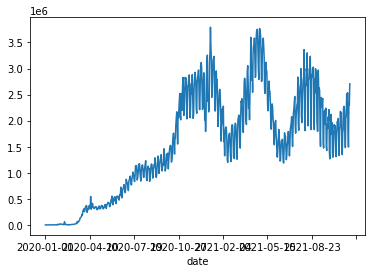

In [107]:
# Plot of new cases over time
covid_df.groupby('date')['new_cases'].sum().plot()

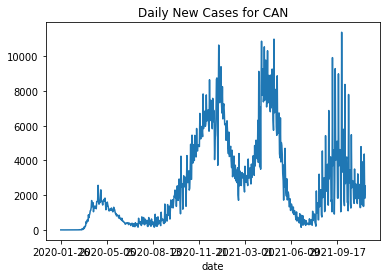

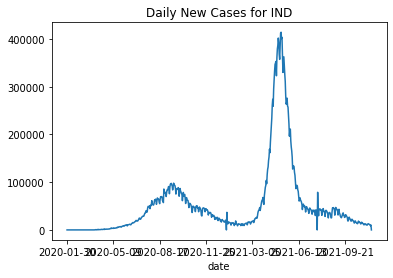

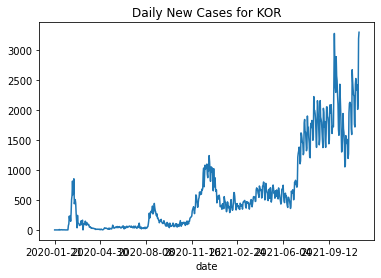

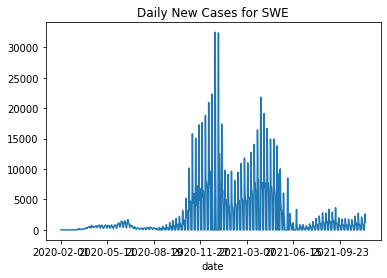

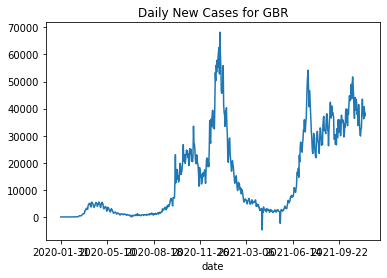

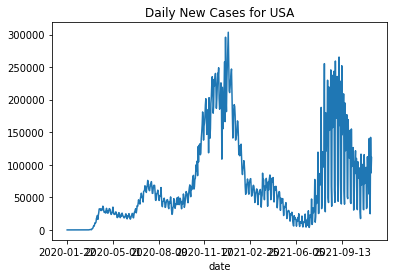

In [120]:
# Plot for each country in chosen model dataframe
for country in ['CAN', 'IND', 'KOR', 'SWE', 'GBR', 'USA']:
    plt.title(f'Daily New Cases for {country}')
    covid_df[covid_df['iso_code'] == country].groupby('date')['new_cases'].sum().plot()
    plt.show()

In [123]:
$ pip install --upgrade jupyterhub
$ pip install --upgrade --user nbconvert

SyntaxError: invalid syntax (<ipython-input-123-4dbb63680539>, line 1)